<a href="https://colab.research.google.com/github/calopezj/Accidentalidad/blob/master/Accidentalidad_Analisis_temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import datetime
import folium
from folium.map import *
from folium import plugins
from folium.plugins import MeasureControl
from folium.plugins import FloatImage

In [ ]:
pdAccidentalidad = pd.read_csv(
    "https://raw.githubusercontent.com/calopezj/Accidentalidad/master/accidentalidad.csv",
    sep = ';',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números
pdAccidentalidad.head()

# Análisis temporal

### Creamos una columna tipo Datetime

In [ ]:
pdAccidentalidad['Date'] = pd.to_datetime(pdAccidentalidad['FECHA_ACCIDENTE'])
pdAccidentalidad.head()

### Agregacion por mes usando la función *resample*

In [ ]:
#print(pdAccidentalidad.resample('M', on='Date').count()['EXPEDIENTE'])
pdAccidentalidad[pdAccidentalidad['Año'] == 2018].resample('M', on='Date').count()['EXPEDIENTE'].plot.bar();

### Agregación por año usando *goupby*

In [ ]:
#pdAccidentalidad[pdAccidentalidad['Año'] == 2014].count()
pdAccidentalidad[['Año', 'EXPEDIENTE']].groupby('Año').count().plot.bar();

### Análisis de días especiales

### Definición de días hábiles

In [ ]:
pdAccidentalidad['EsHabil'] = pdAccidentalidad['Date'].map(lambda x: 0 if x.weekday() > 4 else 1)
pdAccidentalidad.tail(10)

### Comparación cantidad de accidentes en días hábiles *vs.* no hábiles


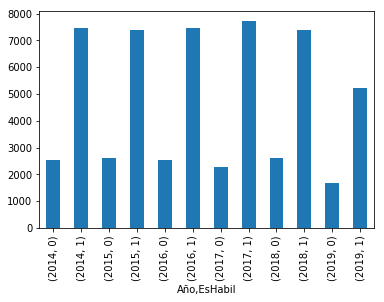

In [ ]:
pdAccidentalidad.groupby([ 'Año', 'EsHabil']).count()['Id'].plot.bar()